In [1]:
from neo import io

# Read simulation data
my_file_name = "basal_activity.nio"
sim = io.NixIO(my_file_name, mode="ro")
block = sim.read_all_blocks()[0]
segment = block.segments[0]
my_spiketrains = segment.spiketrains

In [2]:
my_spiketrains[1]

SpikeTrain containing 23 spikes; units ms; datatype float64 
annotations: {'nix_name': 'neo.spiketrain.5d7b9f0c2dca4335ad20c0b4f2cadf64',
  'senders': [718,
   275,
   274,
   1055,
   711,
   708,
   811,
   516,
   823,
   650,
   191,
   849,
   546,
   870,
   618,
   196,
   904,
   1444,
   972,
   1497,
   402,
   949,
   776],
  'device': 'base_layer_record',
  'pop_size': 1560}
time: 0.0 ms to 5000.0 ms

In [3]:
my_spiketrains[1].magnitude

array([ 276.5,  781.6,  797.4,  984.5, 1530.5, 1732.1, 1757. , 1775. ,
       1849.9, 2064.7, 2540.9, 2593.7, 2777.4, 3100. , 3159.8, 4111.5,
       4621.5, 4731.2, 4788.3, 4806.3, 4902.8, 4937.3, 4961.7])

In [4]:
import matplotlib.pylab as plt  # you might have to pip install matplotlib

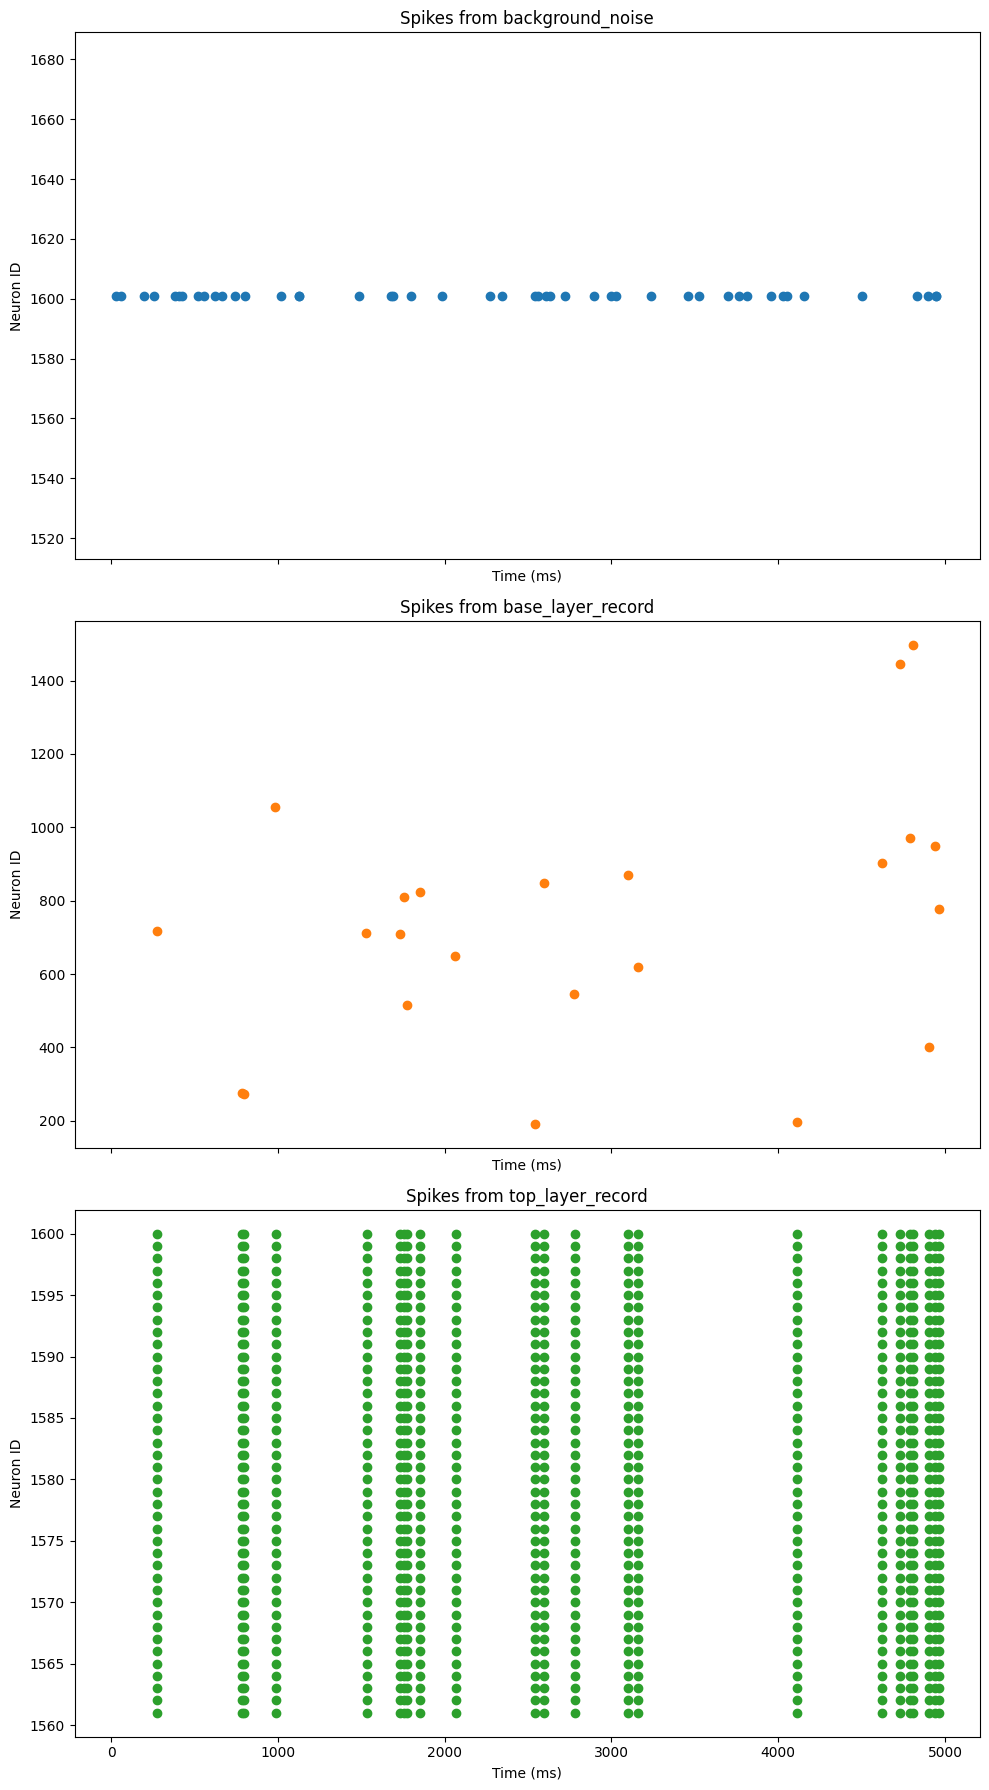

In [5]:
nb_spike_trains = len(my_spiketrains)
fig, ax = plt.subplots(nb_spike_trains, sharex=True, figsize=(10, nb_spike_trains * 6))
for i, spike_t in enumerate(my_spiketrains):  # Iterate over all spike trains
    name = spike_t.annotations["device"]  # Retrieve the device name
    cell_list = spike_t.annotations["senders"]  # Retrieve the ids of the cells spiking
    spike_times = spike_t.magnitude  # Retrieve the spike times
    ax[i].scatter(spike_times, cell_list, c=f"C{i}")
    ax[i].set_xlabel(f"Time ({spike_t.times.units.dimensionality.string})")
    ax[i].set_ylabel(f"Neuron ID")
    ax[i].set_title(f"Spikes from {name}")
plt.tight_layout()
plt.savefig("raster_plot.png", dpi=200)